# Airline Passenger Satisfaction

## Project Summary:
This project focuses on analyzing airline passenger data to predict customer satisfaction using supervised machine learning classification techniques. The dataset includes a variety of passenger details such as demographics, travel class, flight experience, service ratings, and delay information.

## Problem Definition:
The goal is to build a classification model that can predict whether a passenger is "satisfied" or "neutral or dissatisfied" based on several features. Understanding the key factors that influence passenger satisfaction will help airlines enhance service quality and improve the overall passenger experience.

## Dataset Overview:
The dataset includes the following types of features:

Demographics: Gender, Age, Customer Type

Travel Information: Type of Travel, Customer Class, Flight Distance

Service Ratings: Inflight Wifi Service, Food and Drink, Seat Comfort, Inflight Entertainment, Cleanliness, etc.

Operational Data: Departure Delay in Minutes, Arrival Delay in Minutes

Target Variable: Satisfaction (binary classification: "satisfied" or "neutral or dissatisfied")

## Key Objectives:
Explore and preprocess the dataset

Perform feature analysis on the dataset

Train classification models (Decision Tree, Random Forest,Gradient Boosting)

Evaluate model performance using accuracy, F1-score, confusion matrix, etc.

Interpret the results to provide actionable insights for airline service improvement


## Load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [2]:
airline_data = pd.read_csv('airline_passenger_satisfaction.csv')
airline_data

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


# Summarize Data

In [3]:
airline_data.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [5]:
airline_data.isnull().sum()

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

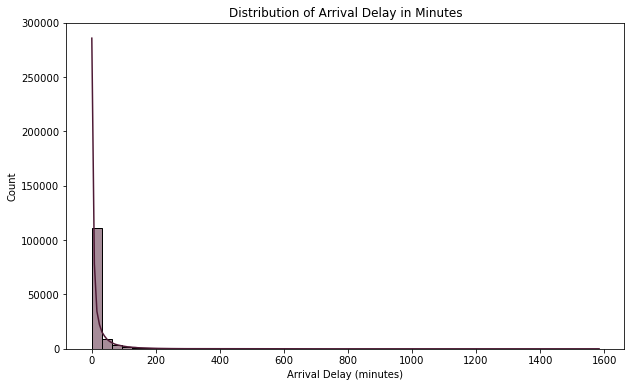

In [6]:
# Plot the distribution of 'arrival_delay_in_minutes'
plt.figure(figsize=(10, 6))
sns.histplot(airline_data['arrival_delay_in_minutes'], bins=50, kde=True, color='#4e1a35')
plt.title('Distribution of Arrival Delay in Minutes')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')
plt.show()


We observe that the arrival_delay_in_minutes go to right it is Right-skewed which indicate most of the data is on the left, with a long tail to the right (big delays)
in this case better full with median 

for example :

delay times (in minutes)=[0, 2, 5, 7, 600]

Mean (average) :(0 + 2 + 5 + 7 + 600) / 5 = 122.8  minutes 

Median Middle value = 5 minutes            



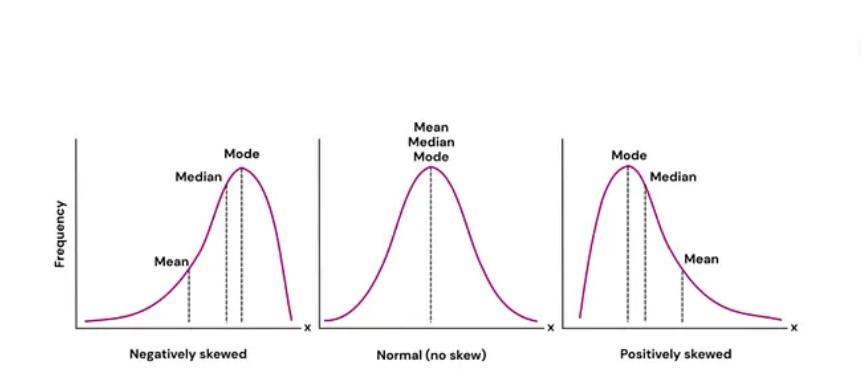

In [40]:
from IPython.display import Image
 
# If image is in the same folder
Image(filename='skewed.png')

In [3]:
#fill missing value with median 
airline_data['arrival_delay_in_minutes'].fillna(airline_data['arrival_delay_in_minutes'].median(),inplace=True)

In [9]:
#check the null values again after fill it
airline_data.isnull().sum()

Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [10]:
#check the duplicated data
airline_data.duplicated().sum()

0

In [11]:
#Frequency Counts for satisfaction Columns
airline_data['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

In [12]:
#Frequency Counts type_of_travel Columns
airline_data['type_of_travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64

In [13]:
airline_data['customer_class'].value_counts(normalize=True) #it help us to know the percentage of each type

Business    0.478596
Eco         0.448945
Eco Plus    0.072459
Name: customer_class, dtype: float64

In [4]:
#statistical summary for categorical column
categorical=['Gender','customer_type','type_of_travel','customer_class','satisfaction']

In [15]:
airline_data[categorical].describe()

,Gender,customer_type,type_of_travel,customer_class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


In [16]:
# this help us to indicates the exact number of values in each cols in the categorical 
for cols in categorical:
    print (f'Count value in each {cols} column')
    print(airline_data[cols].value_counts(), '\n')

Count value in each Gender column
Female    65899
Male      63981
Name: Gender, dtype: int64 

Count value in each customer_type column
Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64 

Count value in each type_of_travel column
Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64 

Count value in each customer_class column
Business    62160
Eco         58309
Eco Plus     9411
Name: customer_class, dtype: int64 

Count value in each satisfaction column
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64 



## Data visualizations

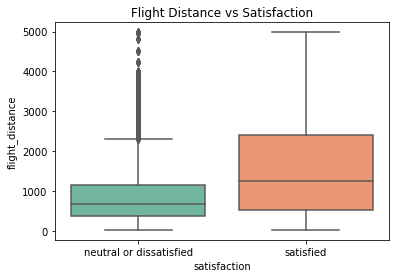

In [17]:
sns.boxplot(data=airline_data, x='satisfaction', y='flight_distance', palette='Set2')
plt.title('Flight Distance vs Satisfaction')
plt.show()


Passengers who are satisfied usually take longer flights compared to those who are not satisfied.

This might be because longer flights give more time for inflight services like food, entertainment, and comfort to make a good impression.

On the other hand, shorter flights may not offer enough time to really impress passengers, so they might feel neutral or dissatisfied.

In [5]:
numeric_cols = airline_data.select_dtypes(include='number')
numeric_cols

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
129876,129876,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
129877,129877,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
129878,129878,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


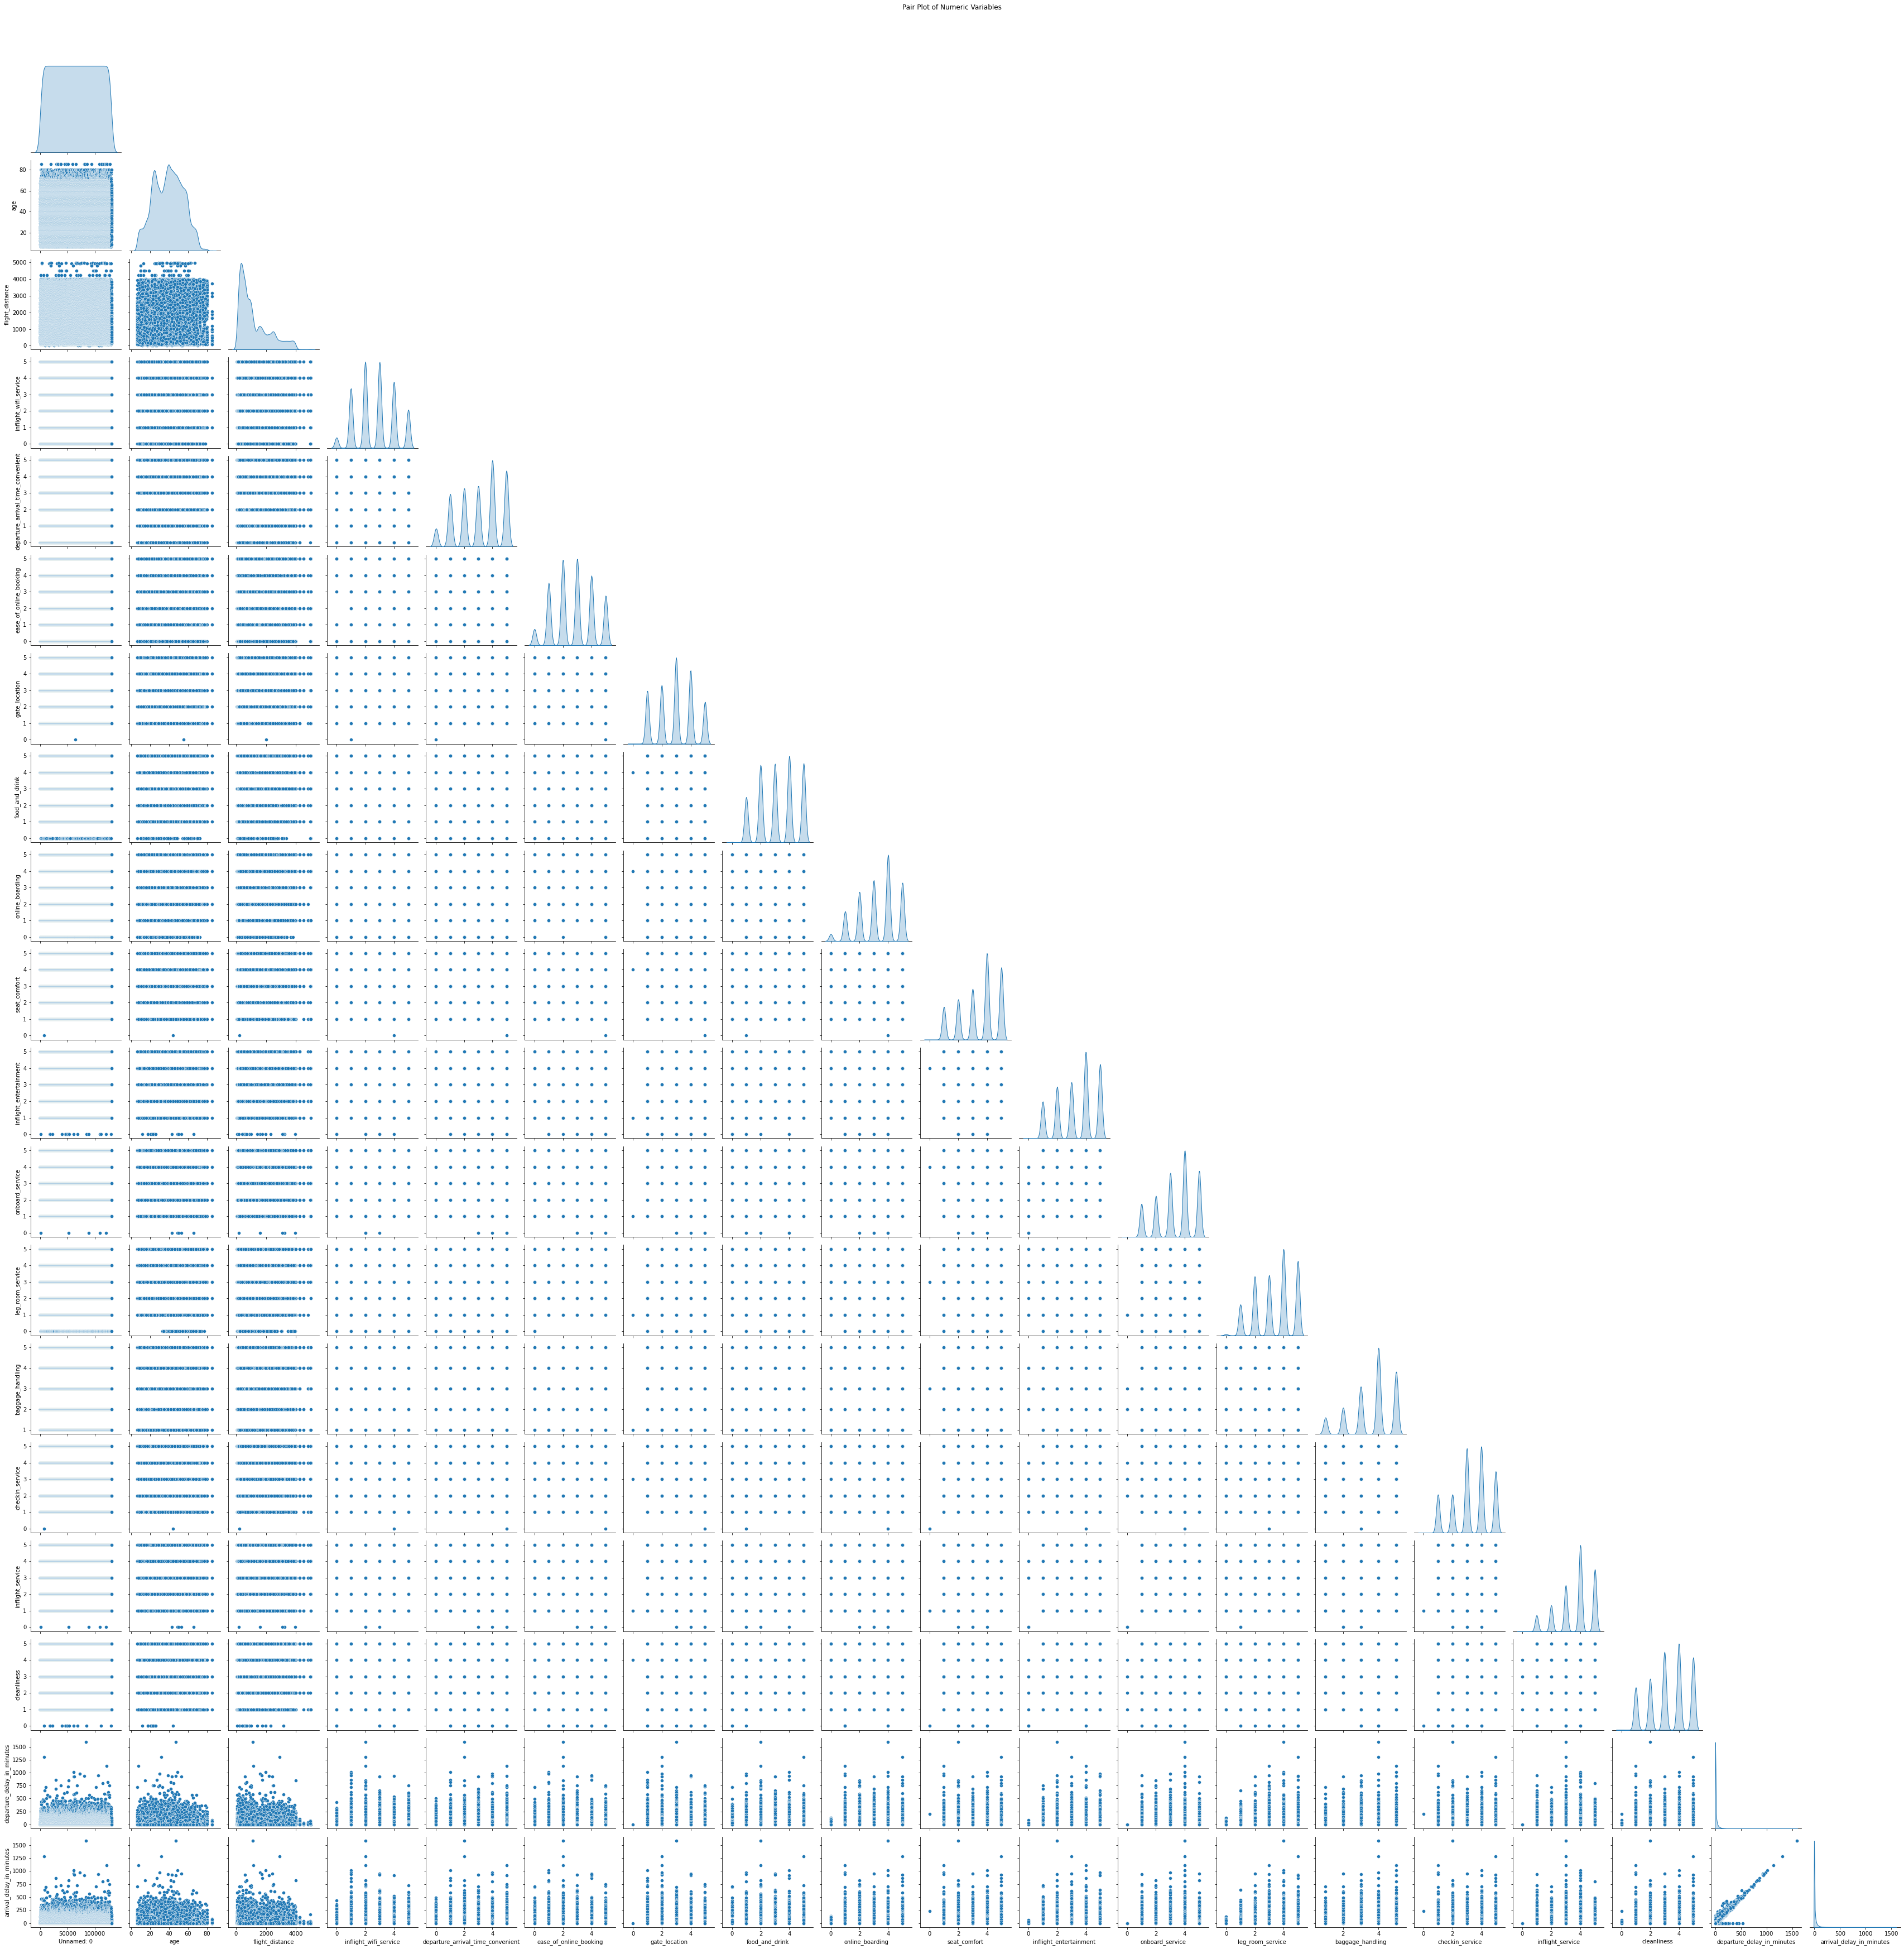

In [6]:
import seaborn as sns 
# Select only numeric columns
numeric_columns = airline_data.select_dtypes(include='number')
 
# Create the pairplot
sns.pairplot(numeric_columns, corner=True, diag_kind='kde')
 
# Optional: add title
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()

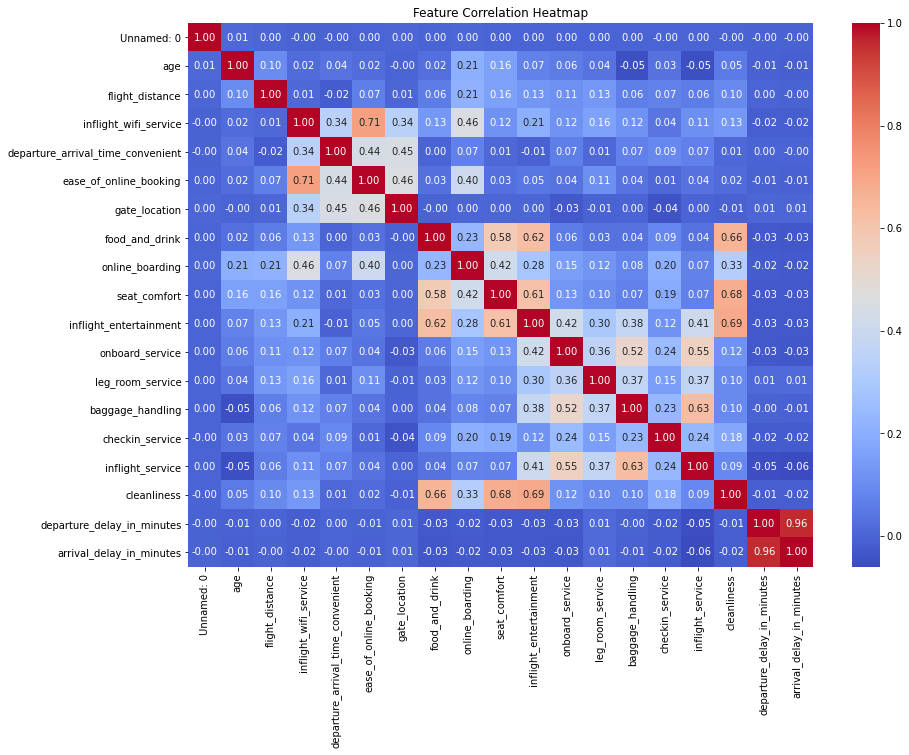

In [7]:
plt.figure(figsize=(14, 10))
sns.heatmap(airline_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


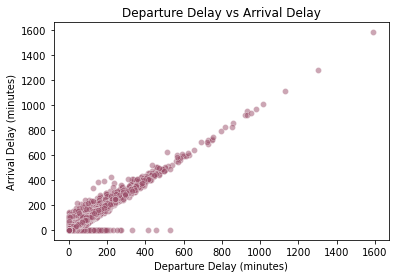

In [8]:
sns.scatterplot(data=airline_data, x='departure_delay_in_minutes', y='arrival_delay_in_minutes', alpha=0.5, color='#9b4f6a')
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()



Does a longer departure delay lead to a longer arrival delay?

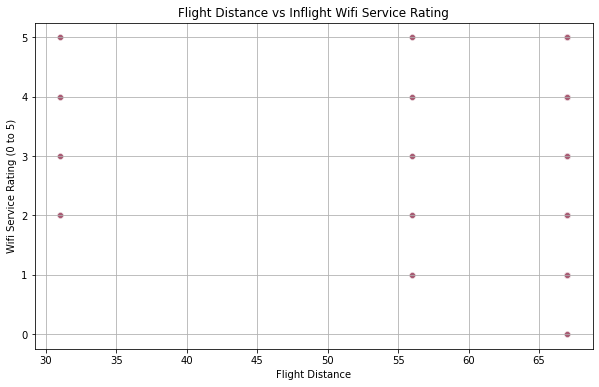

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use only first 100 sorted rows for clarity
df_sorted = airline_data.sort_values(by='flight_distance').head(100)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='flight_distance', y='inflight_wifi_service', data=df_sorted, color='#a85b73')
plt.title('Flight Distance vs Inflight Wifi Service Rating')
plt.xlabel('Flight Distance')
plt.ylabel('Wifi Service Rating (0 to 5)')
plt.grid(True)
plt.show()


Passengers gave a wide range of wifi ratings regardless of flight distance.
However, lower ratings 0 and 1 appear more frequently on longer flights.

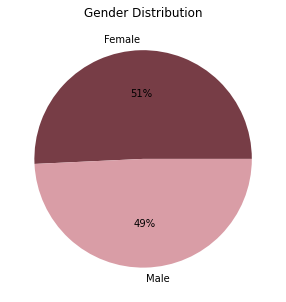

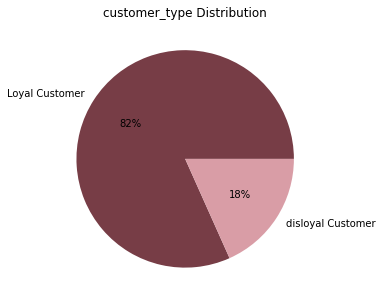

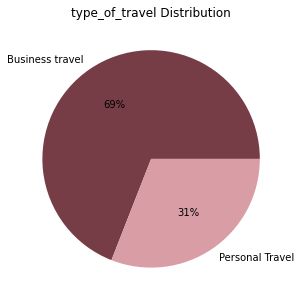

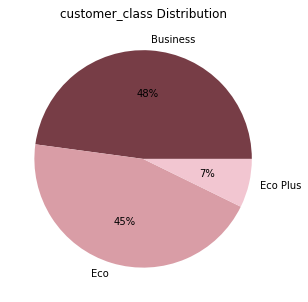

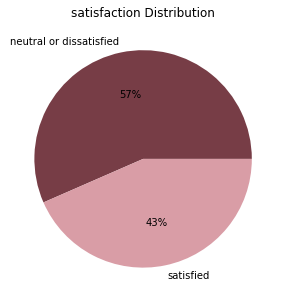

In [23]:
my_colors = ['#773d46','#d99da6', '#f2c6d1','#2e0e29']  

for col in categorical:
    plt.figure(figsize=(5, 5))
    counts = airline_data[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.0f%%', colors=my_colors)
    plt.title(f'{col} Distribution')
    plt.show()


## Prepare Data
a) Data Cleaning

b) Feature Selection

c) Data Transforms


### Data Cleaning

In [6]:
#drop 'Unnamed: 0 ' column because is not necesary
airline_data=airline_data.drop(['Unnamed: 0'],axis=1)

In [7]:
airline_data

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


### Data Transforms
Converting Categorical Column by using (LabelEncoder)

In [8]:
def categoricals(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [9]:
categoricals(airline_data)

Gender : ['Male' 'Female']
customer_type : ['Loyal Customer' 'disloyal Customer']
type_of_travel : ['Personal Travel' 'Business travel']
customer_class : ['Eco Plus' 'Business' 'Eco']
satisfaction : ['neutral or dissatisfied' 'satisfied']


In [43]:
from sklearn import preprocessing
for i in airline_data.columns:
    if airline_data[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            airline_data[i]=label_encoder.fit_transform(airline_data[i])

In [15]:
airline_data['customer_type'].unique()

array([0, 1])

In [16]:
airline_data['customer_class'].unique()

array([2, 0, 1])

In [17]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int32  
 1   customer_type                      129880 non-null  int32  
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  int32  
 4   customer_class                     129880 non-null  int32  
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

Categorical columns with two unique values, such as: Male and Female, Business and Personal, Neutral or Dissatisfied and Satisfied, are encoded using 0 and 1.
Whereas categorical columns with three unique values, like the Class column containing Business, Economy, and Economy Plus, are encoded as 0, 1, and 2.

### Feature Selection

In [11]:
import pandas as pd

# Ensure satisfaction is numeric (label encoded)
from sklearn.preprocessing import LabelEncoder
df_encoded = airline_data.copy()
df_encoded['satisfaction'] = LabelEncoder().fit_transform(df_encoded['satisfaction'])

# Get correlation matrix
correlation_matrix = df_encoded.corr()

# Get correlation of all columns with the target column 'satisfaction'
target_corr = correlation_matrix['satisfaction'].sort_values(ascending=False)


print("Correlation of each feature with 'satisfaction':\n")
print(target_corr)


Correlation of each feature with 'satisfaction':

satisfaction                         1.000000
online_boarding                      0.501749
inflight_entertainment               0.398234
seat_comfort                         0.348829
onboard_service                      0.322205
leg_room_service                     0.312424
cleanliness                          0.307035
flight_distance                      0.298085
inflight_wifi_service                0.283460
baggage_handling                     0.248680
inflight_service                     0.244918
checkin_service                      0.237252
food_and_drink                       0.211340
ease_of_online_booking               0.168877
age                                  0.134091
Gender                               0.011236
gate_location                       -0.002793
departure_delay_in_minutes          -0.050740
departure_arrival_time_convenient   -0.054270
arrival_delay_in_minutes            -0.058145
customer_type                 

#  Evaluate Algorithms

In [12]:
from sklearn.model_selection import train_test_split

X = airline_data.drop(columns = 'satisfaction')
y = airline_data[['satisfaction']]
# Split-out validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [13]:
#to check the numbers of row and columns
X_train.shape

(103904, 22)

## Trying different machine learning models

### Decision Tree

In [14]:
from sklearn import tree

In [15]:
DT = tree.DecisionTreeClassifier()

In [16]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
DT.score(X_train, y_train), DT.score(X_test, y_test)

(1.0, 0.944795195565137)

training Accuracy: 1.0  Model learned training data too well might be overfitting.

testing Accuracy: 0.9449 the result Good but little lower than training maybe it have slight overfitting.

In [25]:
DT.get_depth()

37

Tree Depth = 38  large depth maybe better to reduce the max_depth so we can reduce overfitting(variance).

[Text(0.44720334216475344, 0.9868421052631579, 'x[11] <= 3.5\ngini = 0.491\nsamples = 103904\nvalue = [58830, 45074]'),
 Text(0.16564829713905568, 0.9605263157894737, 'x[6] <= 0.5\ngini = 0.254\nsamples = 52317\nvalue = [44503, 7814]'),
 Text(0.12297337152348509, 0.9342105263157895, 'x[13] <= 0.5\ngini = 0.009\nsamples = 1838\nvalue = [8, 1830]'),
 Text(0.12265319577701675, 0.9078947368421053, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.12329354726995342, 0.9078947368421053, 'gini = 0.0\nsamples = 1830\nvalue = [0, 1830]'),
 Text(0.2083232227546263, 0.9342105263157895, 'x[6] <= 3.5\ngini = 0.209\nsamples = 50479\nvalue = [44495, 5984]'),
 Text(0.1239338987628901, 0.9078947368421053, 'x[4] <= 0.5\ngini = 0.122\nsamples = 45822\nvalue = [42841, 2981]'),
 Text(0.07755724512803437, 0.881578947368421, 'x[13] <= 3.5\ngini = 0.308\nsamples = 12799\nvalue = [10361, 2438]'),
 Text(0.06959614245046856, 0.8552631578947368, 'x[19] <= 4.5\ngini = 0.14\nsamples = 8902\nvalue = [8228, 674]'),

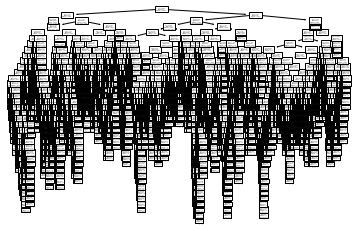

In [26]:
tree.plot_tree(DT)

In [17]:
#try to reduce the overfit by reduce the depth 
DT1 = tree.DecisionTreeClassifier(max_depth=6,random_state=42)

In [18]:
DT1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [29]:
DT1.score(X_train, y_train), DT1.score(X_test, y_test)

(0.9206190329534956, 0.917346781644595)

In [30]:
DT1.get_depth()

6

[Text(0.46691176470588236, 0.9285714285714286, 'x[11] <= 3.5\ngini = 0.491\nsamples = 103904\nvalue = [58830, 45074]'),
 Text(0.15257352941176472, 0.7857142857142857, 'x[6] <= 0.5\ngini = 0.254\nsamples = 52317\nvalue = [44503, 7814]'),
 Text(0.07352941176470588, 0.6428571428571429, 'x[19] <= 0.5\ngini = 0.009\nsamples = 1838\nvalue = [8, 1830]'),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.08823529411764706, 0.5, 'gini = 0.0\nsamples = 1830\nvalue = [0, 1830]'),
 Text(0.23161764705882354, 0.6428571428571429, 'x[6] <= 3.5\ngini = 0.209\nsamples = 50479\nvalue = [44495, 5984]'),
 Text(0.11764705882352941, 0.5, 'x[4] <= 0.5\ngini = 0.122\nsamples = 45822\nvalue = [42841, 2981]'),
 Text(0.058823529411764705, 0.35714285714285715, 'x[13] <= 3.5\ngini = 0.308\nsamples = 12799\nvalue = [10361, 2438]'),
 Text(0.029411764705882353, 0.21428571428571427, 'x[19] <= 4.5\ngini = 0.14\nsamples = 8902\nvalue = [8228, 674]'),
 Text(0.014705882352941176, 0.071428

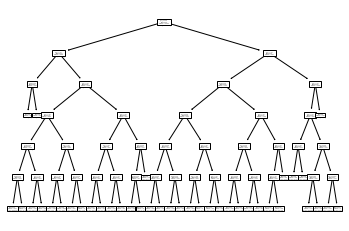

In [31]:
tree.plot_tree(DT1)

In [19]:
#try to reduce the overfit by reduce the depth 
DT2 = tree.DecisionTreeClassifier(max_depth=3,random_state=42)

In [20]:
DT2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [34]:
DT2.score(X_train, y_train), DT2.score(X_test, y_test)

(0.8852979673544811, 0.8811595318755775)

[Text(0.5, 0.875, 'x[11] <= 3.5\ngini = 0.491\nsamples = 103904\nvalue = [58830, 45074]'),
 Text(0.25, 0.625, 'x[6] <= 0.5\ngini = 0.254\nsamples = 52317\nvalue = [44503, 7814]'),
 Text(0.125, 0.375, 'x[19] <= 0.5\ngini = 0.009\nsamples = 1838\nvalue = [8, 1830]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1830\nvalue = [0, 1830]'),
 Text(0.375, 0.375, 'x[6] <= 3.5\ngini = 0.209\nsamples = 50479\nvalue = [44495, 5984]'),
 Text(0.3125, 0.125, 'gini = 0.122\nsamples = 45822\nvalue = [42841, 2981]'),
 Text(0.4375, 0.125, 'gini = 0.458\nsamples = 4657\nvalue = [1654, 3003]'),
 Text(0.75, 0.625, 'x[3] <= 0.5\ngini = 0.401\nsamples = 51587\nvalue = [14327, 37260]'),
 Text(0.625, 0.375, 'x[13] <= 3.5\ngini = 0.253\nsamples = 41049\nvalue = [6105, 34944]'),
 Text(0.5625, 0.125, 'gini = 0.472\nsamples = 10105\nvalue = [3851, 6254]'),
 Text(0.6875, 0.125, 'gini = 0.135\nsamples = 30944\nvalue = [2254, 28690]'),
 Text(0.875, 0.375

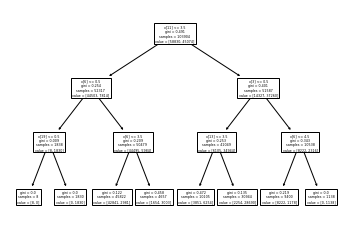

In [35]:
tree.plot_tree(DT2)

### Result afetr try max depth 6 and 3:

max_depth=6:
The model fits the data well. There's only a small drop in the test score, so it's a good balance. There's a small amount of overfitting, but it's acceptable.

max_depth=3:
The model is too simple but it doesn’t learn enough patterns from the data. This is may lead to underfitting.

In [36]:
# Make predictions
y_pred = DT1.predict(X_test)
y_pred_proba = DT1.predict_proba(X_test)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     14622
           1       0.90      0.92      0.91     11354

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



Accuracy: 91.73%
Precision: 91.78%
Recall: 91.73%


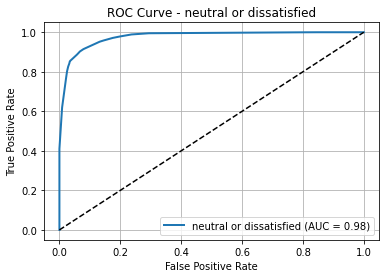

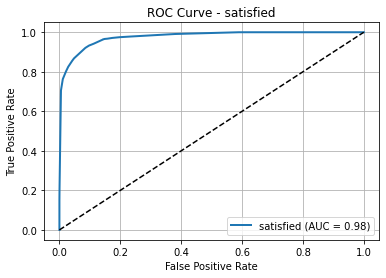

In [37]:
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, PrecisionRecallDisplay, RocCurveDisplay,accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# ROC Curves
for i, label in enumerate(['neutral or dissatisfied', 'satisfied']):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {label}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

The model achieves high overall performance with an accuracy of 91.73% which indicating that it correctly predicts satisfaction for most samples.

Precision is 91.78% mean when the model predicts a certain satisfaction level, it's correct 91.78% of the time.

Recall is 91.73% showing that the model successfully captures 91.73% of all actual satisfaction cases.

FPR is Out of all actual negatives, how many did the model incorrectly classify as positive

The ROC curves for both classes show good separation from the diagonal line, with high AUC values, confirming the model's ability to distinguish between satisfied and dissatisfied customers.

these results suggest the model is well-balanced and performs reliably on both classes.


## Visualize the Decision Tree

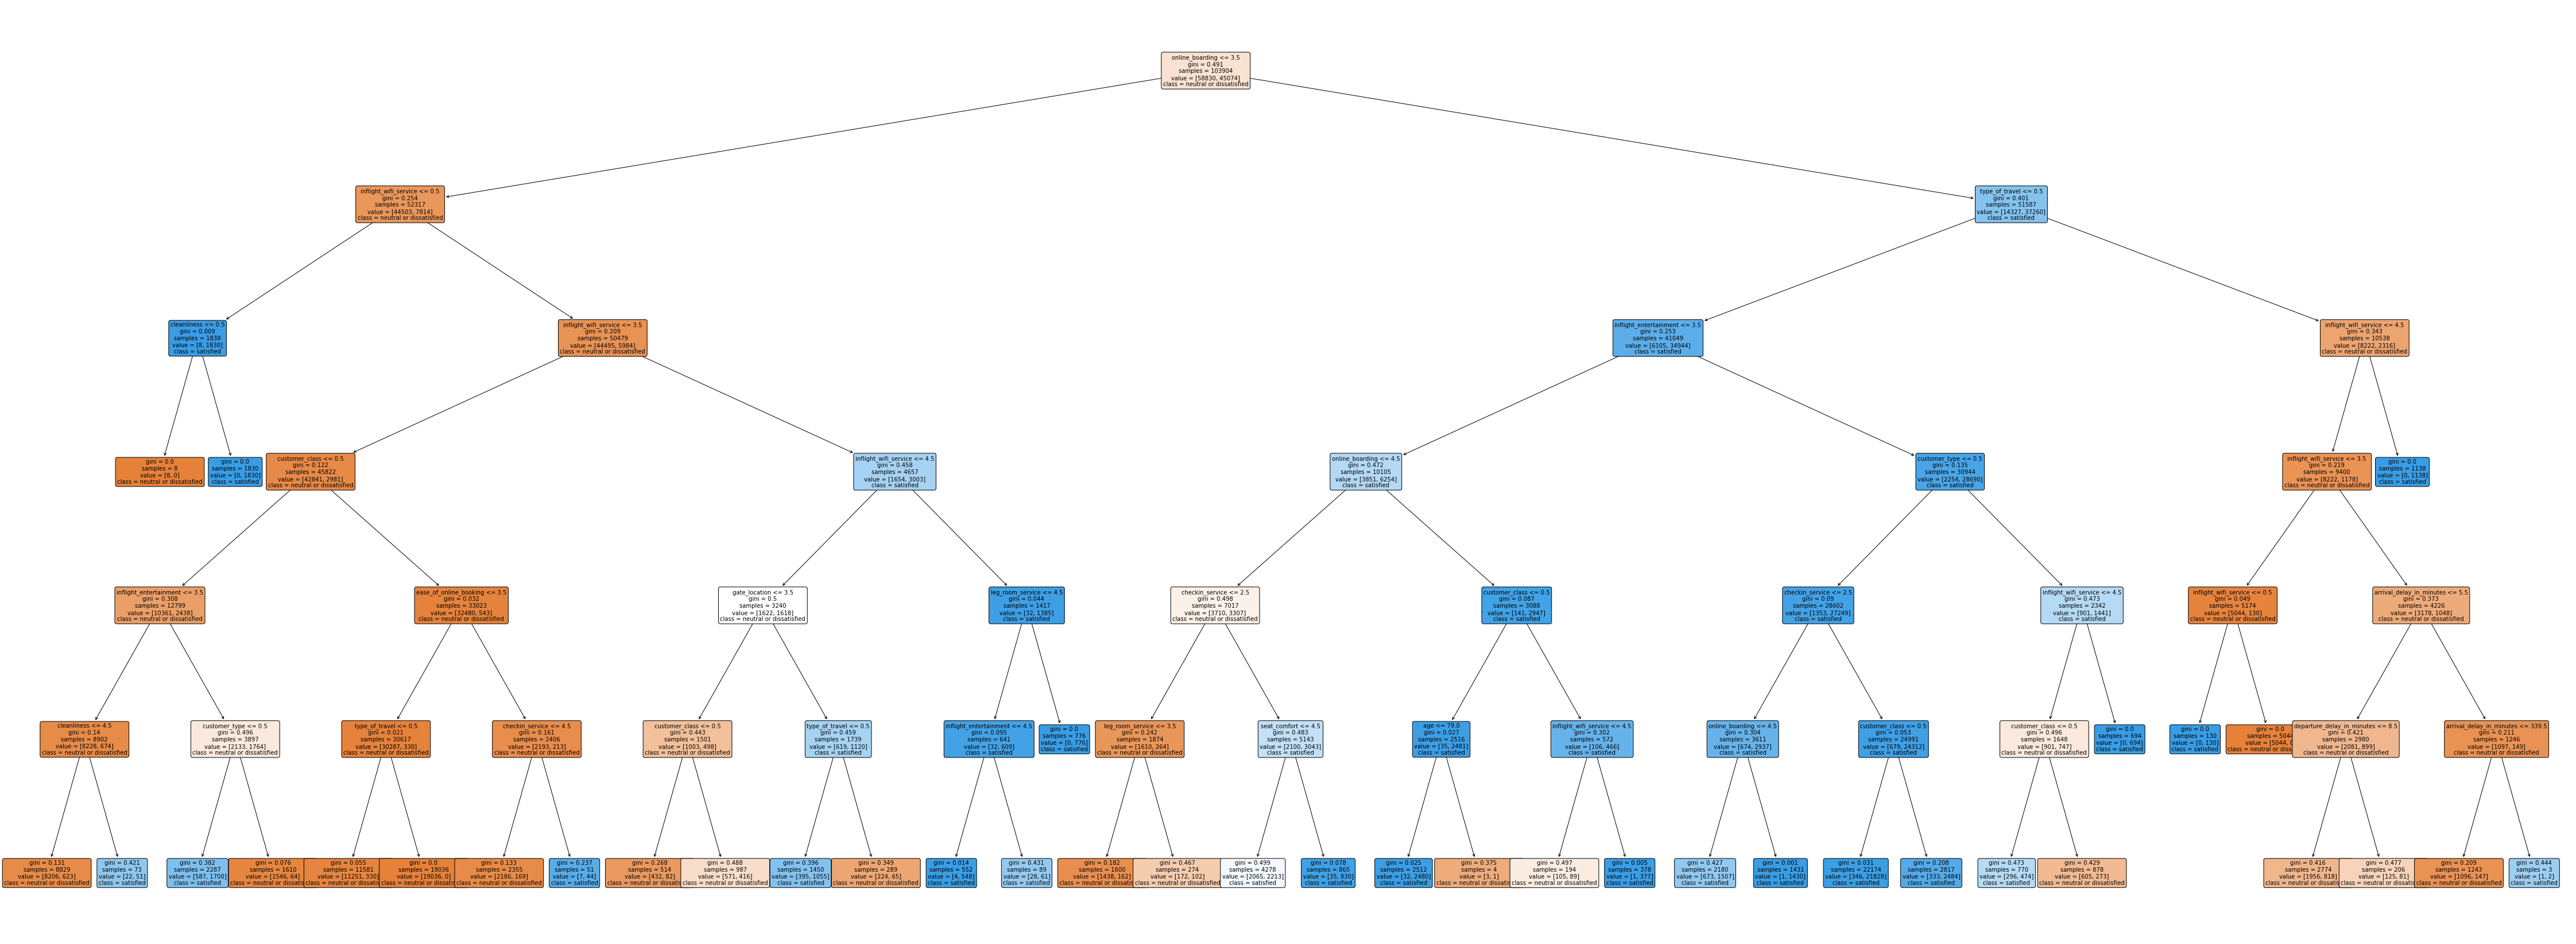

In [38]:
from sklearn.tree import plot_tree


# Plot decision tree
plt.figure(figsize=(80, 30))
plot_tree(DT1,
          feature_names=X.columns,
          class_names=['neutral or dissatisfied', 'satisfied'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()


## Random forests

In [21]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(
    max_depth=7, 
    random_state=0, 
    n_estimators=200) #It sets how many trees the model will build and use together to make predictions.

In [22]:
RF.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=0)

In [50]:
RF.score(X_train, y_train), RF.score(X_test, y_test)

(0.9347763319987681, 0.9317831844779797)

The Random Forest model performs well, with a small gap between training and testing accuracy. This indicates that the model generalizes well and is not overfitting. 
we Use max_depth=7 which helps control complexity, and the model seems to balance bias and variance effectively.


In [51]:
# Make predictions
RF_y_pred = RF.predict(X_test)

In [52]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14622
           1       0.93      0.91      0.92     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



### Observation Summary:
For class 0 "neutral/dissatisfied" it has high recall (0.95) meaning it correctly identifies most of actual neutral/dissatisfied passengers. Precision is also strong (0.93) leading to a balanced F1-score of 0.94.

For class 1 "satisfied" it has slightly lower recall (0.91)meaning it misses a few of actual satisfied passengers, but precision is still high predicted(0.93).and F1-scores above 0.92 show good results.

Overall, the model is slightly better at detecting dissatisfied customers, but still performs well for both groups. The F1-scores indicate a good balance between precision and recall, showing reliable performance.

In [23]:
for name, score in zip(X.columns, RF.feature_importances_):
    print(f"{name}: {score:.4f}")

Gender: 0.0010
customer_type: 0.0331
age: 0.0107
type_of_travel: 0.1338
customer_class: 0.1052
flight_distance: 0.0234
inflight_wifi_service: 0.1469
departure_arrival_time_convenient: 0.0074
ease_of_online_booking: 0.0345
gate_location: 0.0053
food_and_drink: 0.0068
online_boarding: 0.2336
seat_comfort: 0.0512
inflight_entertainment: 0.0652
onboard_service: 0.0244
leg_room_service: 0.0478
baggage_handling: 0.0164
checkin_service: 0.0135
inflight_service: 0.0149
cleanliness: 0.0221
departure_delay_in_minutes: 0.0008
arrival_delay_in_minutes: 0.0019


In [24]:
#create datafram to sort the feature and their importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': RF.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)


                              Feature  Importance
11                    online_boarding    0.233615
6               inflight_wifi_service    0.146906
3                      type_of_travel    0.133774
4                      customer_class    0.105220
13             inflight_entertainment    0.065209
12                       seat_comfort    0.051232
15                   leg_room_service    0.047779
8              ease_of_online_booking    0.034528
1                       customer_type    0.033126
14                    onboard_service    0.024443
5                     flight_distance    0.023432
19                        cleanliness    0.022104
16                   baggage_handling    0.016391
18                   inflight_service    0.014884
17                    checkin_service    0.013504
2                                 age    0.010679
7   departure_arrival_time_convenient    0.007385
10                     food_and_drink    0.006791
9                       gate_location    0.005274


Feature importance in Random Forest shows which columns help the model make better decisions. It looks at how often and how well each feature splits the data in the trees. The more useful a feature is, the higher its score. These scores are scaled to add up to 1, so we can easily compare them. This helps us understand what matters most for predictions.

### perfom features selection in Random Forest by using the most important features

In [25]:
top_n = 10
top_features = importances['Feature'].head(top_n).values

In [26]:
X_top = X[top_features]

In [27]:
X_top

,online_boarding,inflight_wifi_service,type_of_travel,customer_class,inflight_entertainment,seat_comfort,leg_room_service,ease_of_online_booking,customer_type,onboard_service
0,3,3,1,2,5,5,3,3,0,4
1,3,3,0,0,1,1,5,3,1,1
2,5,2,0,0,5,5,3,2,0,4
3,2,2,0,0,2,2,5,5,0,2
4,5,3,0,0,3,5,4,3,0,3
...,...,...,...,...,...,...,...,...,...,...
129875,3,3,0,0,4,4,2,3,1,3
129876,4,4,0,0,4,4,5,4,0,4
129877,1,2,1,1,2,2,3,1,0,4
129878,4,3,0,0,4,4,2,3,0,3


In [28]:
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

In [29]:
RF_top = RandomForestClassifier(max_depth=7, random_state=0, n_estimators=200)
RF_top.fit(X_train_top, y_train_top.values.ravel())

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=0)

In [61]:
RF_top.score(X_train_top, y_train_top), RF_top.score(X_test_top, y_test_top)

(0.9345645980905452, 0.9303587927317524)

when we select only the top 10 important features. The accuracy dropped slightly, but the model stayed strong. This maybe will be better because the model it will be simpler, faster, and less likely to overfit.since by reduce the feature to the half and the test not to much differ then I can contuine with these reather than take them all.


In [62]:
# Make predictions
RF_y_pred_top = RF_top.predict(X_test_top)

In [63]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_top, RF_y_pred_top))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14622
           1       0.93      0.91      0.92     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [64]:
#Now we try to use Cross-validation just to check which score better since  bootstrap sampling is automatically used in random forest
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RF_top, X_train_top, y_train_top.values.ravel(), cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.9313315  0.93652856 0.93378567 0.93402627 0.93546679]
Mean CV score: 0.9342277606158991


### why we use Cross validation?

model before using Cross validation shows a very slight difference between training and testing scores, which suggests a good fit. However, single test-score evaluation can sometimes be misleading as it only uses one split.

Cross-Validation helps check generalization better. Without it,we may have a model that works well on one split of the data but may not generalize well on new or unseen data. Cross-validation helps us reduce bias.

All values are very close (0.9345–0.9354), meaning that the model isn't overfitting or underfitting on any specific fold.

mean of the cross-validation scores (0.9342) is very close to your test score (0.9303), meaning that model still not have overfitting or underfitting.

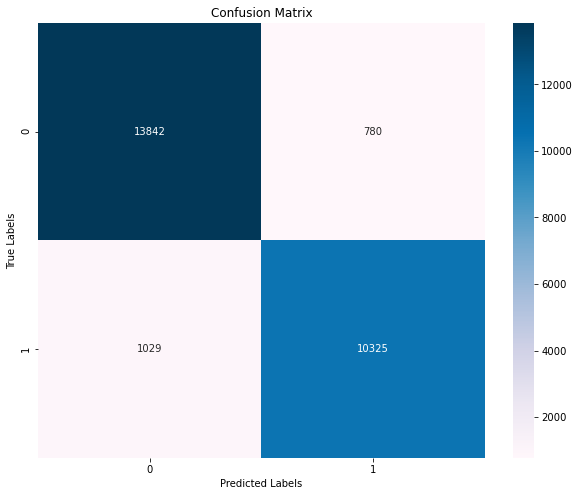

In [65]:
from sklearn.metrics import confusion_matrix
#import seaborn as sns
#import pandas as pd

# Compute confusion matrix
RF_conf_matrix = confusion_matrix(y_test, RF_y_pred_top)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(RF_conf_matrix), annot=True, fmt='d', cmap='PuBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


True Negatives (13,842)
These are cases where the actual class was "neutral or dissatisfied" and the model correctly predicted them.
means the model is doing a very good by identifying dissatisfied customers.

True Positives (10,325)
These are satisfied customers that the model also correctly predicted as satisfied.
It is good number showing us the model is good at recognizing satisfied customers.

False Positives (780)
The model predicted “satisfied” but the actual label was “neutral/dissatisfied”.
this risky because the business may assume a customer is happy when they are not. This might affect service decisions or feedback interpretation.

False Negatives (1029)
The model predicted “neutral/dissatisfied” but the actual label was “satisfied”.
This means some satisfied customers are being skipped or not consider.

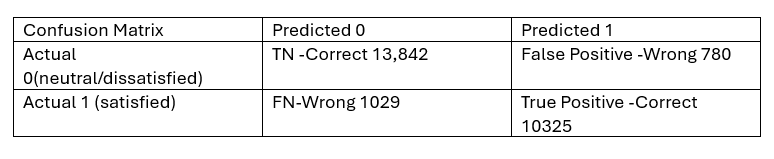

In [42]:
Image(filename='CM.png')

In [71]:
# here we try use the different thresholds which can lead to different trade-offs in (False Positives and False Negatives )
y_proba = RF_top.predict_proba(X_test_top)
custom_threshold = 0.6
y_pred_custom = (y_proba[:, 1] >= custom_threshold).astype(int)


In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14622
           1       0.95      0.89      0.92     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



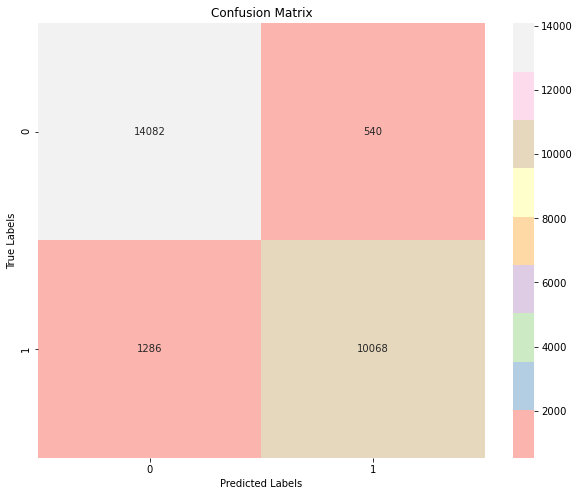

In [68]:
from sklearn.metrics import confusion_matrix
#import seaborn as sns
#import pandas as pd

# Compute confusion matrix
RF_conf_matrix = confusion_matrix(y_test, y_pred_custom)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(RF_conf_matrix), annot=True, fmt='d', cmap='Pastel1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [69]:
y_proba1 = RF_top.predict_proba(X_test_top)
custom_threshold = 0.4
y_pred_custom1 = (y_proba1[:, 1] >= custom_threshold).astype(int)


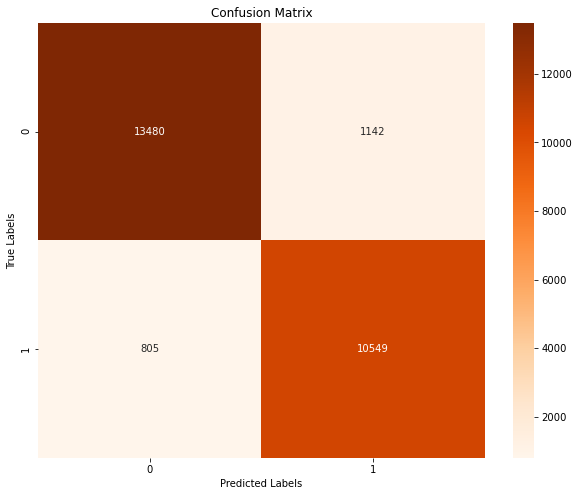

In [70]:
from sklearn.metrics import confusion_matrix
#import seaborn as sns
#import pandas as pd

# Compute confusion matrix
RF_conf_matrix = confusion_matrix(y_test, y_pred_custom1)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(RF_conf_matrix), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.1)

In [31]:
GB.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(max_depth=5)

In [75]:
GB.score(X_train, y_train), GB.score(X_test, y_test)

(0.9601940252540807, 0.9588851247305205)

Overall, the model shows a good balance between learning and generalization.

There’s no strong sign of overfitting or underfitting.

In [32]:
GB1 = GradientBoostingClassifier(max_depth=5, n_estimators=300, learning_rate=0.1)

In [33]:
GB1.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(max_depth=5, n_estimators=300)

In [78]:
GB1.score(X_train, y_train), GB1.score(X_test, y_test)

(0.9702610101632276, 0.9634277794887589)

This one is better than the first. More trees help the model learn more patterns. Scores are higher and still no big gap, so no overfit.

In [34]:
GB2 = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.3)

In [35]:
GB2.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(learning_rate=0.3, max_depth=5)

In [82]:
GB2.score(X_train, y_train), GB2.score(X_test, y_test)

(0.9698952879581152, 0.9633507853403142)

This one uses a higher learning rate. It learns faster and gives good results too. but it is better to not set LR too high so we avoide large step in learn and may result in miss important details.

In [85]:
for name, score in zip(X.columns, GB1.feature_importances_):
    print(f"{name}: {score:.4f}")

Gender: 0.0000
customer_type: 0.0295
age: 0.0065
type_of_travel: 0.1623
customer_class: 0.0323
flight_distance: 0.0039
inflight_wifi_service: 0.2156
departure_arrival_time_convenient: 0.0011
ease_of_online_booking: 0.0027
gate_location: 0.0061
food_and_drink: 0.0007
online_boarding: 0.4097
seat_comfort: 0.0129
inflight_entertainment: 0.0340
onboard_service: 0.0118
leg_room_service: 0.0150
baggage_handling: 0.0115
checkin_service: 0.0209
inflight_service: 0.0105
cleanliness: 0.0088
departure_delay_in_minutes: 0.0005
arrival_delay_in_minutes: 0.0035


In [86]:
#create datafram to sort the feature and their importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': GB1.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

                              Feature  Importance
11                    online_boarding    0.409722
6               inflight_wifi_service    0.215639
3                      type_of_travel    0.162346
13             inflight_entertainment    0.033977
4                      customer_class    0.032295
1                       customer_type    0.029501
17                    checkin_service    0.020869
15                   leg_room_service    0.015028
12                       seat_comfort    0.012920
14                    onboard_service    0.011777
16                   baggage_handling    0.011454
18                   inflight_service    0.010483
19                        cleanliness    0.008805
2                                 age    0.006522
9                       gate_location    0.006066
5                     flight_distance    0.003937
21           arrival_delay_in_minutes    0.003500
8              ease_of_online_booking    0.002724
7   departure_arrival_time_convenient    0.001124


In [88]:
# Make predictions
GB_y_pred = GB1.predict(X_test)

In [89]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, GB_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14622
           1       0.98      0.94      0.96     11354

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## Evaluate and Compare Models

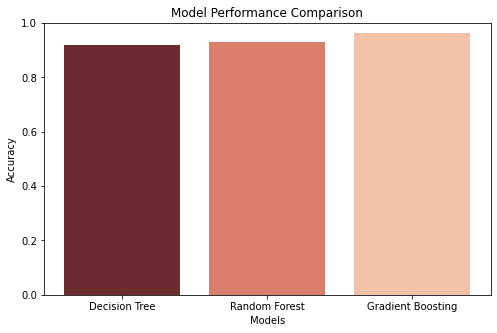

In [98]:
#compare model performance according to their score
models = {
    'Decision Tree': DT1.score(X_test, y_test),
    'Random Forest': RF.score(X_test, y_test),
    'Gradient Boosting': GB1.score(X_test, y_test)
}

# Define custom colors
custom_colors = ['#6b2c2f', '#d77f6b', '#f1c1a8']  

#plot score
plt.figure(figsize=(8, 5))
plt.bar(models.keys(), models.values(), color=custom_colors)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()


Gradient Boosting gave the best performance in this comparison, followed closely by Random Forest. Decision Tree is simpler but slightly less accurate. 

### now we try also the last two model with use top 10 importance features

In [36]:
#Gradient Boosting
GB_with_top_feature = GradientBoostingClassifier(max_depth=5, n_estimators=300, learning_rate=0.1)

In [37]:
GB_with_top_feature.fit(X_train_top, y_train_top.values.ravel())

GradientBoostingClassifier(max_depth=5, n_estimators=300)

In [94]:
GB_with_top_feature.score(X_train_top, y_train_top), GB_with_top_feature.score(X_test_top, y_test_top)

(0.9530720665229443, 0.9474514936864799)

Before using feature importance: Training Accuracy: 0.9702 ,Testing Accuracy: 0.9634
            
After selecting only top 10 important features: Training Accuracy: 0.9531 ,Testing Accuracy: 0.9475
            
There is a small drop in accuracy after reducing to 10 features.

However, the performance is still strong, and the model becomes simpler and faster.

Using fewer features can help reduce overfitting, speed up training, and make the model easier to interpret.

In [38]:
#Decision Tree
DT1_with_top_feature = tree.DecisionTreeClassifier(max_depth=6,random_state=42)

In [39]:
DT1_with_top_feature.fit(X_train_top, y_train_top.values.ravel())

DecisionTreeClassifier(max_depth=6, random_state=42)

In [97]:
DT1_with_top_feature.score(X_train_top, y_train_top), DT1_with_top_feature.score(X_test_top, y_test_top)

(0.922110794579612, 0.9169233138281491)

Before using top features: Train Accuracy: 0.8853 ,Test Accuracy: 0.8812

After using top 10 important features: Train Accuracy: 0.9221 ,Test Accuracy: 0.9169
            
Accuracy actually improved after selecting the top features.

Removing less important features helped reduce noise and improved performance.

In [103]:
# Make predictions
DT1_y_pred_with_top_10 = DT1_with_top_feature.predict(X_test_top)

In [104]:
# Classification report
print(classification_report(y_test_top, DT1_y_pred_with_top_10))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     14622
           1       0.91      0.89      0.90     11354

    accuracy                           0.92     25976
   macro avg       0.92      0.91      0.92     25976
weighted avg       0.92      0.92      0.92     25976



Before using the top 10 feature and after the accuracy was same 0.92 
The model still performs well after feature selection, with the same accuracy.Feature selection reduced model complexity and input size without significantly hurting results.

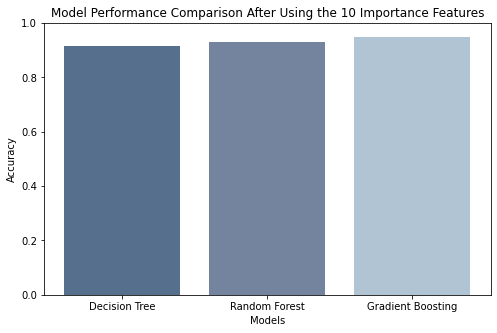

In [101]:
#compare model performance according to their score
models = {
    'Decision Tree': DT1_with_top_feature.score(X_test_top, y_test_top),
    'Random Forest': RF_top.score(X_test_top, y_test_top),
    'Gradient Boosting': GB_with_top_feature.score(X_test_top, y_test_top)
}

# Define custom colors
custom_colors = ['#556f8d', '#74849f', '#b0c4d4']  

#plot score
plt.figure(figsize=(8, 5))
plt.bar(models.keys(), models.values(), color=custom_colors)
plt.title('Model Performance Comparison After Using the 10 Importance Features')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()


In [ ]:
#we should use model selection also because we forget use it